Name: Harshith Akkapelli

Task-5: Audio Dataset

Dataset: [Audio MNIST](https://www.kaggle.com/datasets/alanchn31/free-spoken-digits)

### **Load the data**

In [ ]:
import zipfile
import os

# Path to the zip file and extraction directory
zip_file_path = '/content/Dataset_5.zip'
extraction_dir = '/content/Dataset_5'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the files in the extracted directory
extracted_files = os.listdir(extraction_dir)
extracted_files


['free-spoken-digit-dataset-master']

In [ ]:
# List the contents of the extracted free-spoken-digit-dataset-master directory
fsdd_dir = os.path.join(extraction_dir, 'free-spoken-digit-dataset-master')
fsdd_contents = os.listdir(fsdd_dir)
fsdd_contents


['pip_requirements.txt',
 'utils',
 '.gitignore',
 'recordings',
 'README.md',
 'acquire_data',
 '__init__.py',
 'metadata.py']

In [ ]:
# Read the contents of the README.md file
readme_file_path = os.path.join(fsdd_dir, 'README.md')

with open(readme_file_path, 'r') as file:
    readme_contents = file.read()

# Display the first 1000 characters (for a brief overview)
readme_contents[:1000]


"# Free Spoken Digit Dataset (FSDD)\n[![DOI](https://zenodo.org/badge/61622039.svg)](https://zenodo.org/badge/latestdoi/61622039)\n\nA simple audio/speech dataset consisting of recordings of spoken digits in `wav` files at 8kHz. The recordings are trimmed so that they have near minimal silence at the beginnings and ends.\n\nFSDD is an open dataset, which means it will grow over time as data is contributed.  In order to enable reproducibility and accurate citation the dataset is versioned using Zenodo DOI as well as `git tags`.\n\n### Current status\n- 6 speakers\n- 3,000 recordings (50 of each digit per speaker)\n- English pronunciations\n\n### Organization\nFiles are named in the following format:\n`{digitLabel}_{speakerName}_{index}.wav`\nExample: `7_jackson_32.wav`\n\n### Contributions\nPlease contribute your homemade recordings. All recordings should be mono 8kHz `wav ` files and be trimmed to have minimal silence. Don't forget to update `metadata.py` with the speaker meta-data.\n\

In [ ]:
# List the contents of the 'recordings' directory to check a few file names
recordings_dir = os.path.join(fsdd_dir, 'recordings')
recording_files = os.listdir(recordings_dir)

# Display the first few file names to understand their naming convention and quantity
recording_files[:10], len(recording_files)


(['9_lucas_34.wav',
  '6_nicolas_43.wav',
  '5_george_47.wav',
  '6_jackson_18.wav',
  '7_nicolas_34.wav',
  '1_lucas_17.wav',
  '2_lucas_1.wav',
  '5_nicolas_23.wav',
  '9_jackson_14.wav',
  '8_jackson_34.wav'],
 3000)

### **EDA**

In [ ]:
import os
import wave
import pandas as pd

In [ ]:
# Analyzing the entire dataset using the wave library
full_audio_analysis = {
    "filename": [],
    "duration": [],
    "n_channels": [],
    "frame_rate": [],
    "n_frames": [],
    "speaker": [],
    "digit": []
}

for file in recording_files:
    path = os.path.join(recordings_dir, file)

    with wave.open(path, 'rb') as wav_file:
        duration = wav_file.getnframes() / wav_file.getframerate()
        n_channels = wav_file.getnchannels()
        frame_rate = wav_file.getframerate()
        n_frames = wav_file.getnframes()

    # Extract digit and speaker from filename
    parts = file.split('_')
    digit, speaker = parts[0], parts[1]

    # Append data to the analysis structure
    full_audio_analysis["filename"].append(file)
    full_audio_analysis["duration"].append(duration)
    full_audio_analysis["n_channels"].append(n_channels)
    full_audio_analysis["frame_rate"].append(frame_rate)
    full_audio_analysis["n_frames"].append(n_frames)
    full_audio_analysis["speaker"].append(speaker)
    full_audio_analysis["digit"].append(digit)

# Convert to DataFrame for full dataset
full_audio_df = pd.DataFrame(full_audio_analysis)

# Checking the structure of the full dataset DataFrame
full_audio_df.head(), full_audio_df.shape


(           filename  duration  n_channels  frame_rate  n_frames  speaker digit
 0    9_lucas_34.wav  0.520000           1        8000      4160    lucas     9
 1  6_nicolas_43.wav  0.347500           1        8000      2780  nicolas     6
 2   5_george_47.wav  0.407000           1        8000      3256   george     5
 3  6_jackson_18.wav  0.860375           1        8000      6883  jackson     6
 4  7_nicolas_34.wav  0.305000           1        8000      2440  nicolas     7,
 (3000, 7))

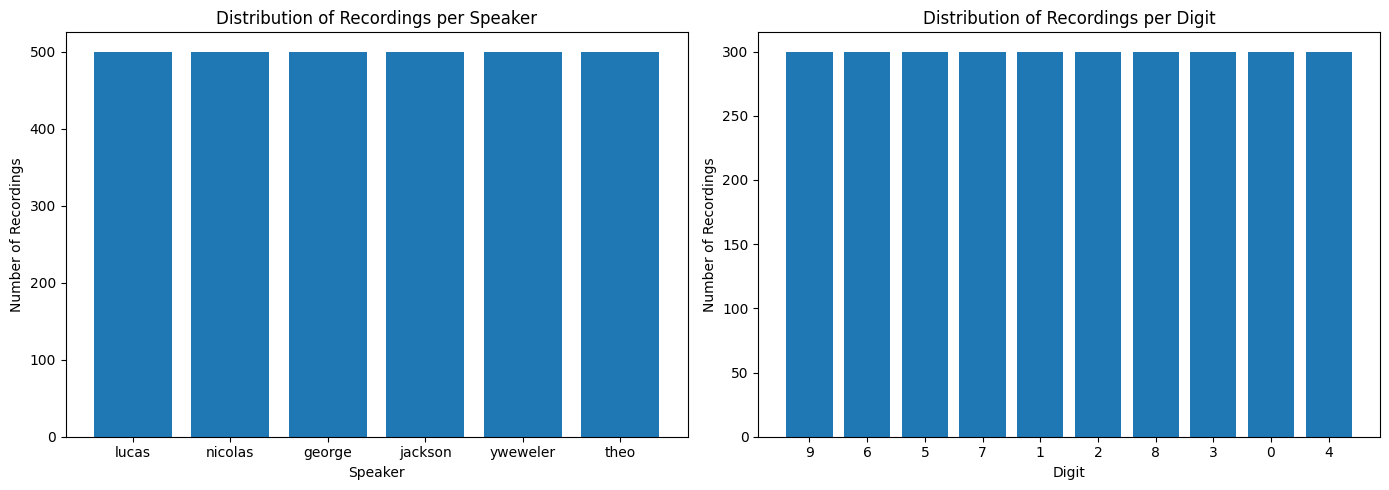

(count    3000.000000
 mean        0.437434
 std         0.147643
 min         0.143500
 25%         0.342344
 50%         0.419813
 75%         0.510281
 max         2.282750
 Name: duration, dtype: float64,
 lucas       500
 nicolas     500
 george      500
 jackson     500
 yweweler    500
 theo        500
 Name: speaker, dtype: int64,
 9    300
 6    300
 5    300
 7    300
 1    300
 2    300
 8    300
 3    300
 0    300
 4    300
 Name: digit, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt

# Summary statistics for the duration
duration_stats = full_audio_df['duration'].describe()

# Distribution of recordings per speaker
speaker_distribution = full_audio_df['speaker'].value_counts()

# Distribution of recordings per digit
digit_distribution = full_audio_df['digit'].value_counts()

# Plotting the distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting speaker distribution
axes[0].bar(speaker_distribution.index, speaker_distribution.values)
axes[0].set_title('Distribution of Recordings per Speaker')
axes[0].set_xlabel('Speaker')
axes[0].set_ylabel('Number of Recordings')

# Plotting digit distribution
axes[1].bar(digit_distribution.index, digit_distribution.values)
axes[1].set_title('Distribution of Recordings per Digit')
axes[1].set_xlabel('Digit')
axes[1].set_ylabel('Number of Recordings')

plt.tight_layout()
plt.show()

duration_stats, speaker_distribution, digit_distribution


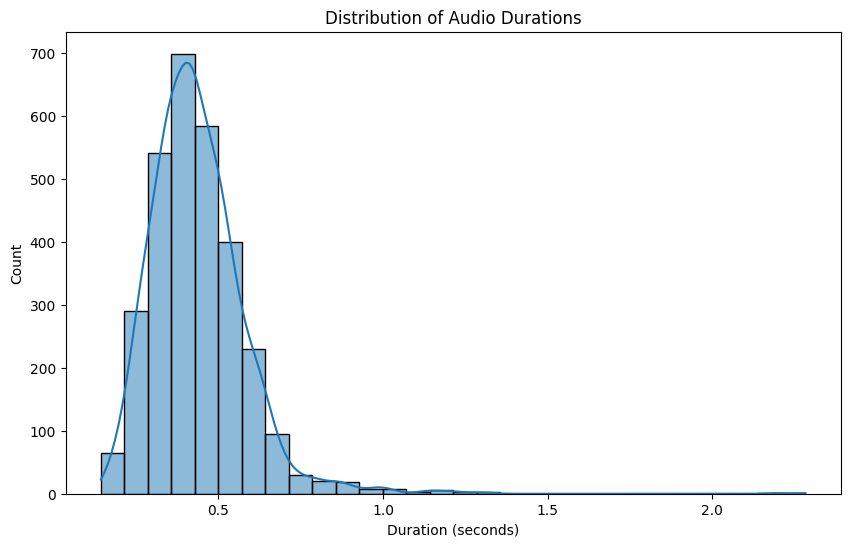

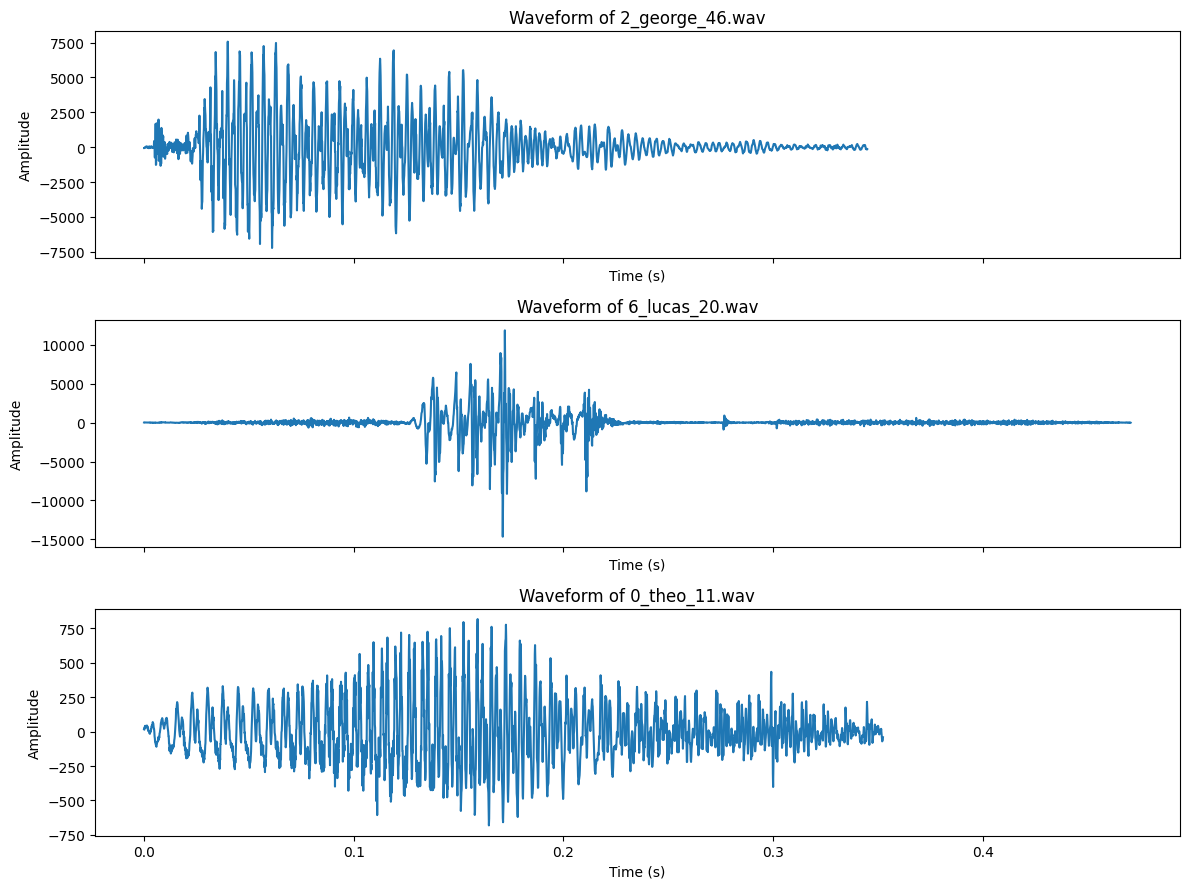

In [ ]:
import seaborn as sns
import numpy as np

# Plotting the distribution of audio durations
plt.figure(figsize=(10, 6))
sns.histplot(full_audio_df['duration'], bins=30, kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

# Selecting a few files for waveform analysis
waveform_files = full_audio_df.sample(n=3, random_state=1)

# Function to plot waveform
def plot_waveform(filename, ax):
    filepath = os.path.join(recordings_dir, filename)
    with wave.open(filepath, 'rb') as wav_file:
        n_frames = wav_file.getnframes()
        audio_signal = wav_file.readframes(n_frames)
        audio_signal = np.frombuffer(audio_signal, dtype=np.int16)  # Assuming 16-bit audio

    # Time axis (in seconds)
    time_axis = np.linspace(0, len(audio_signal) / wav_file.getframerate(), num=len(audio_signal))

    # Plot
    ax.plot(time_axis, audio_signal)
    ax.set_title(f"Waveform of {filename}")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')

# Plotting waveforms
fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
for i, row in enumerate(waveform_files.iterrows()):
    plot_waveform(row[1]['filename'], axes[i])

plt.tight_layout()
plt.show()


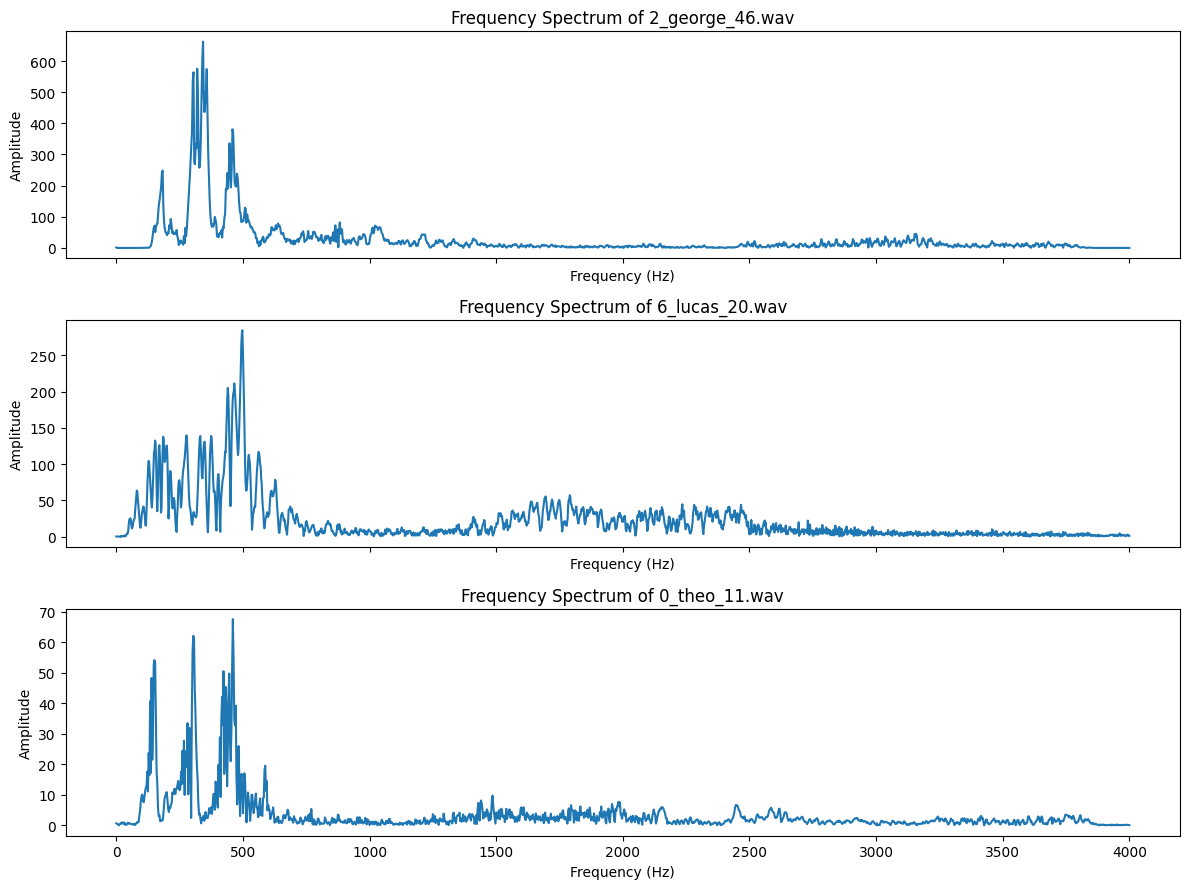

In [ ]:
import numpy as np
from scipy.fft import fft

# Function to plot the frequency spectrum
def plot_frequency_spectrum(filename, ax):
    filepath = os.path.join(recordings_dir, filename)
    with wave.open(filepath, 'rb') as wav_file:
        n_frames = wav_file.getnframes()
        audio_signal = wav_file.readframes(n_frames)
        audio_signal = np.frombuffer(audio_signal, dtype=np.int16)  # Assuming 16-bit audio

    # FFT and Frequency bins
    N = len(audio_signal)
    T = 1.0 / wav_file.getframerate()
    yf = fft(audio_signal)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

    # Plot
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    ax.set_title(f"Frequency Spectrum of {filename}")
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')

# Plotting frequency spectra
fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
for i, row in enumerate(waveform_files.iterrows()):
    plot_frequency_spectrum(row[1]['filename'], axes[i])

plt.tight_layout()
plt.show()


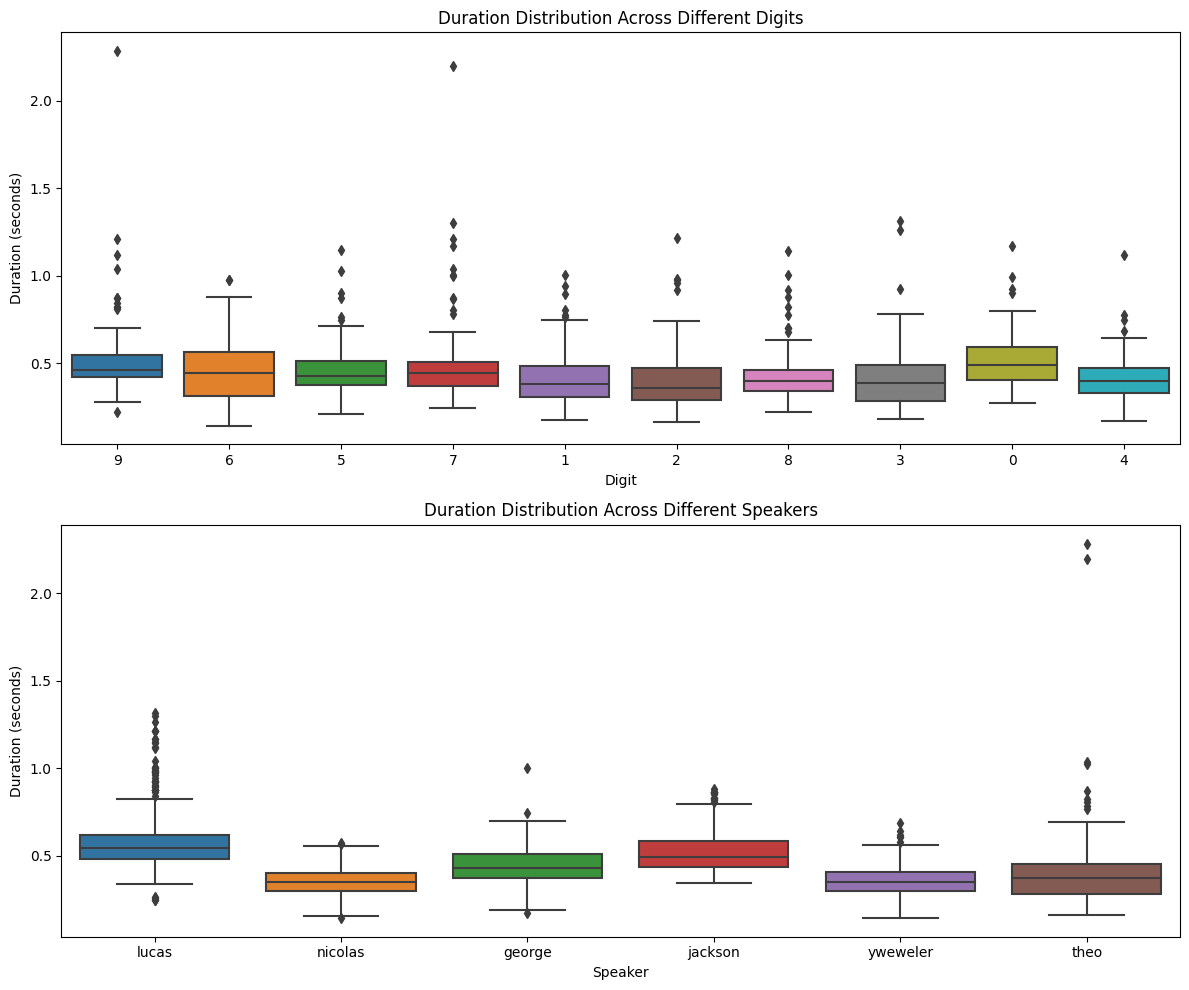

In [ ]:
# Boxplots for duration distribution across different digits and speakers

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Duration distribution across digits
sns.boxplot(x='digit', y='duration', data=full_audio_df, ax=axes[0])
axes[0].set_title('Duration Distribution Across Different Digits')
axes[0].set_xlabel('Digit')
axes[0].set_ylabel('Duration (seconds)')

# Duration distribution across speakers
sns.boxplot(x='speaker', y='duration', data=full_audio_df, ax=axes[1])
axes[1].set_title('Duration Distribution Across Different Speakers')
axes[1].set_xlabel('Speaker')
axes[1].set_ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()


### **Data Preprocessing**

In [ ]:
from scipy.io import wavfile

def normalize_audio_length(filename, target_length, pad_value=0):
    """
    Normalize the length of an audio file.
    If the file is shorter than the target length, pad it with `pad_value`.
    If it's longer, truncate it to the target length.

    :param filename: Path to the audio file.
    :param target_length: Target length of the audio file in number of frames.
    :param pad_value: Value used for padding shorter audio files.
    :return: Normalized audio signal.
    """
    # Read the audio file
    sampling_rate, audio_signal = wavfile.read(filename)

    # Length of the audio signal
    current_length = len(audio_signal)

    if current_length > target_length:
        # Truncate the signal to the target length
        return audio_signal[:target_length]
    elif current_length < target_length:
        # Pad the signal to the target length
        padding = np.full((target_length - current_length,), pad_value)
        return np.concatenate((audio_signal, padding))
    else:
        # Length is already equal to the target, return as is
        return audio_signal

# Determine the target length based on the median duration
# Convert median duration from seconds to number of frames
median_duration_sec = full_audio_df['duration'].median()
target_length_frames = int(median_duration_sec * full_audio_df['frame_rate'].iloc[0]) # Assuming all files have same frame rate

# Test the function on a sample file
sample_file_path = os.path.join(recordings_dir, full_audio_df['filename'].iloc[0])
normalized_audio = normalize_audio_length(sample_file_path, target_length_frames)

len(normalized_audio), target_length_frames


(3358, 3358)

In [ ]:
from scipy.fft import rfft
from scipy.signal import get_window
from scipy.stats import kurtosis, skew

def spectral_centroid(audio_signal, sampling_rate):
    """
    Calculate the spectral centroid of an audio signal.

    :param audio_signal: Audio signal array.
    :param sampling_rate: Sampling rate of the audio signal.
    :return: Spectral centroid.
    """
    magnitude_spectrum = np.abs(rfft(audio_signal * get_window("hann", len(audio_signal))))
    frequencies = np.linspace(0, sampling_rate/2, len(magnitude_spectrum))
    centroid = np.sum(frequencies * magnitude_spectrum) / np.sum(magnitude_spectrum)
    return centroid

def zero_crossing_rate(audio_signal):
    """
    Calculate the zero crossing rate of an audio signal.

    :param audio_signal: Audio signal array.
    :return: Zero crossing rate.
    """
    zero_crossings = np.where(np.diff(np.sign(audio_signal)))[0]
    rate = len(zero_crossings) / len(audio_signal)
    return rate

def chroma_features(audio_signal, sampling_rate):
    """
    Calculate the chroma features of an audio signal.

    :param audio_signal: Audio signal array.
    :param sampling_rate: Sampling rate of the audio signal.
    :return: Chroma features.
    """
    stft = np.abs(rfft(audio_signal * get_window("hann", len(audio_signal))))
    n_fft_bins = stft.shape[0]
    freqs = np.linspace(0, sampling_rate/2, n_fft_bins)
    chroma_mapping = np.remainder(np.round(12 * np.log2(freqs/440.0)).astype(int), 12)

    chroma = np.zeros(12)
    for i in range(12):
        chroma[i] = np.sum(stft[chroma_mapping == i])
    return chroma / np.sum(chroma)
# Feature extraction for the entire dataset
audio_features = {
    "filename": [],
    "spectral_centroid": [],
    "zero_crossing_rate": [],
    "chroma_features": []
}
sampling_rate, _ = wavfile.read(sample_file_path)

for file in recording_files:
    # Normalize audio length
    filepath = os.path.join(recordings_dir, file)
    normalized_audio = normalize_audio_length(filepath, target_length_frames)

    # Extract features
    spectral_centroid_value = spectral_centroid(normalized_audio, sampling_rate)
    zero_crossing_rate_value = zero_crossing_rate(normalized_audio)
    chroma_values = chroma_features(normalized_audio, sampling_rate)

    # Append features to the dictionary
    audio_features["filename"].append(file)
    audio_features["spectral_centroid"].append(spectral_centroid_value)
    audio_features["zero_crossing_rate"].append(zero_crossing_rate_value)
    audio_features["chroma_features"].append(chroma_values)

# Convert to DataFrame
audio_features_df = pd.DataFrame(audio_features)

# Check the first few rows of the DataFrame
audio_features_df.head()


<ipython-input-16-1e7227c29ba7>:40: RuntimeWarning: divide by zero encountered in log2
  chroma_mapping = np.remainder(np.round(12 * np.log2(freqs/440.0)).astype(int), 12)


,filename,spectral_centroid,zero_crossing_rate,chroma_features
0,9_lucas_34.wav,1052.508446,0.166170,"[0.07033039182008534, 0.04931323021098019, 0.0..."
1,6_nicolas_43.wav,1012.185740,0.289160,"[0.09225330557433072, 0.07658632658588295, 0.0..."
2,5_george_47.wav,1543.237945,0.275462,"[0.09882401817532789, 0.09765458903655044, 0.0..."
3,6_jackson_18.wav,1105.308392,0.432102,"[0.17841941966012678, 0.13097227830736685, 0.1..."
4,7_nicolas_34.wav,975.978716,0.209946,"[0.13184652442842176, 0.12013518135314577, 0.0..."


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing spectral centroid and zero crossing rate
scaler = StandardScaler()
standardized_features = scaler.fit_transform(
    audio_features_df[['spectral_centroid', 'zero_crossing_rate']]
)

# Aggregating chroma features
chroma_means = np.array([np.mean(chroma) for chroma in audio_features_df['chroma_features']])
chroma_stds = np.array([np.std(chroma) for chroma in audio_features_df['chroma_features']])

# Adding standardized and aggregated features back into the DataFrame
audio_features_df['spectral_centroid_std'] = standardized_features[:, 0]
audio_features_df['zero_crossing_rate_std'] = standardized_features[:, 1]
audio_features_df['chroma_mean'] = chroma_means
audio_features_df['chroma_std'] = chroma_stds

# Dropping the original non-standardized features and chroma array
audio_features_df.drop(['spectral_centroid', 'zero_crossing_rate', 'chroma_features'], axis=1, inplace=True)

audio_features_df.head()


,filename,spectral_centroid_std,zero_crossing_rate_std,chroma_mean,chroma_std
0,9_lucas_34.wav,-0.155158,-0.362634,0.083333,0.019541
1,6_nicolas_43.wav,-0.287150,1.060650,0.083333,0.027202
2,5_george_47.wav,1.451190,0.902124,0.083333,0.028577
3,6_jackson_18.wav,0.017677,2.714830,0.083333,0.038133
4,7_nicolas_34.wav,-0.405669,0.143958,0.083333,0.026912


### **Clustering and anamoly detection**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

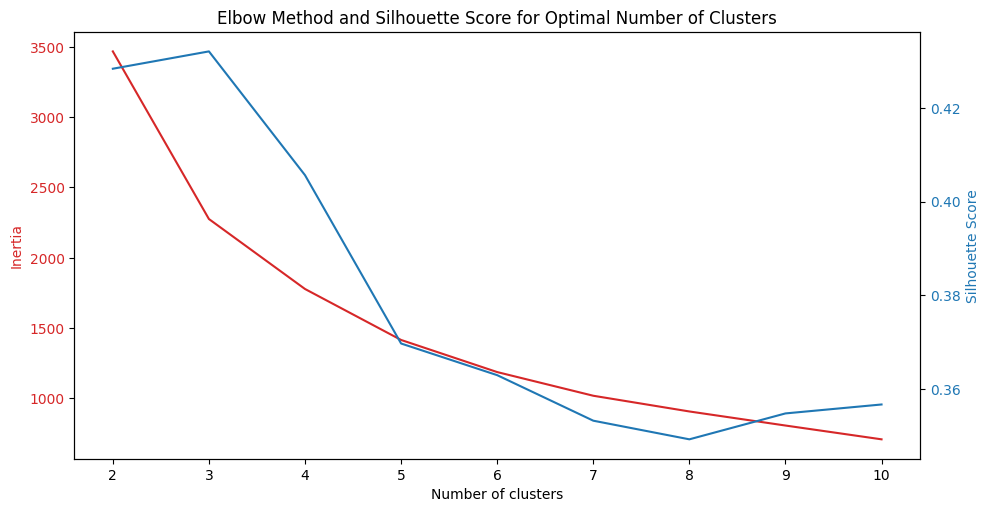

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting the features for clustering
features_for_clustering = audio_features_df[['spectral_centroid_std', 'zero_crossing_rate_std', 'chroma_mean', 'chroma_std']]

# Finding the optimal number of clusters using the elbow method and silhouette score
# We'll test a range of cluster numbers
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features_for_clustering)
    cluster_labels = kmeans.predict(features_for_clustering)

    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(range_n_clusters, inertia, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range_n_clusters, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Elbow Method and Silhouette Score for Optimal Number of Clusters')
plt.show()

In [ ]:
# Performing K-Means clustering with 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features_for_clustering)
cluster_labels = kmeans.predict(features_for_clustering)

# Adding the cluster labels to our DataFrame
audio_features_df['cluster'] = cluster_labels

# Viewing the distribution of audio files across the clusters
cluster_distribution = audio_features_df['cluster'].value_counts()
cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    1402
2     916
1     476
3     206
Name: cluster, dtype: int64

In [ ]:
from scipy.spatial.distance import cdist

# Calculate the Euclidean distances of each point from the centroid of its cluster
centroids = kmeans.cluster_centers_
distances = cdist(features_for_clustering, centroids, 'euclidean')

# For each point, get the distance to its own cluster centroid
distance_to_centroid = distances[np.arange(len(distances)), cluster_labels]

# Adding the distance to the centroid to our DataFrame
audio_features_df['distance_to_centroid'] = distance_to_centroid

# Identifying potential anomalies using the IQR method
Q1 = audio_features_df.groupby('cluster')['distance_to_centroid'].quantile(0.25)
Q3 = audio_features_df.groupby('cluster')['distance_to_centroid'].quantile(0.75)
IQR = Q3 - Q1

# A common threshold for outliers is 1.5 times the IQR from the Q3 value
threshold = Q3 + 1.5 * IQR

# Flagging outliers
audio_features_df['anomaly'] = audio_features_df.apply(
    lambda row: row['distance_to_centroid'] > threshold[row['cluster']], axis=1
)

# Count the number of anomalies in each cluster
anomalies_count = audio_features_df['anomaly'].sum()
anomalies_distribution = audio_features_df[audio_features_df['anomaly']].groupby('cluster').size()

anomalies_count, anomalies_distribution


(38,
 cluster
 0     9
 1    17
 2     3
 3     9
 dtype: int64)

In [ ]:
# Check for missing values in the dataset
missing_values = audio_features_df.isnull().sum()
missing_values


filename                  0
spectral_centroid_std     0
zero_crossing_rate_std    0
chroma_mean               0
chroma_std                0
distance_to_centroid      0
cluster                   0
anomaly                   0
dtype: int64

### **Auto ML**

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 72.6 MB/s e

In [ ]:
!pip uninstall scipy
!pip install scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have s

In [ ]:
from pycaret.classification import *

# Setting up the PyCaret environment
# Since our target variable (the digit spoken) is not in our feature DataFrame,
# we need to add it from the original DataFrame

# Merging the digit label with the feature DataFrame
full_audio_df['filename'] = full_audio_df['filename'].apply(lambda x: x.split('.')[0] + '.wav')
# The 'digit' column should be merged based on the 'filename'
merged_df = pd.merge(audio_features_df, full_audio_df[['filename', 'digit']], on='filename')

# Checking the first few rows to ensure the merge is correct
merged_df.head()

# Setting up PyCaret with the dataset
clf_setup = setup(data=merged_df,
                  target='digit',
                  ignore_features=['filename', 'cluster', 'distance_to_centroid', 'anomaly'],
                  session_id=123)

# Choosing three simple models for training: Logistic Regression, Decision Tree, k-NN
models_to_train = ['lr', 'dt', 'knn']

# Training the models
trained_models = [create_model(i) for i in models_to_train]

# Checking the performance of the trained models
models_performance = pull()
models_performance


,Description,Value
0,Session id,123
1,Target,digit
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9"
4,Original data shape,"(3000, 9)"
5,Transformed data shape,"(3000, 5)"
6,Transformed train set shape,"(2100, 5)"
7,Transformed test set shape,"(900, 5)"
8,Ignore features,4
9,Numeric features,4


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3000,0.7499,0.3000,0.2420,0.2558,0.2222,0.2262
1,0.3000,0.7566,0.3000,0.2468,0.2630,0.2222,0.2249
2,0.2381,0.7389,0.2381,0.1836,0.2026,0.1534,0.1560
3,0.2952,0.7796,0.2952,0.2566,0.2619,0.2169,0.2200
4,0.2619,0.7388,0.2619,0.2308,0.2364,0.1799,0.1828
5,0.2619,0.7129,0.2619,0.2622,0.2385,0.1799,0.1823
6,0.3000,0.7388,0.3000,0.2666,0.2645,0.2222,0.2256
7,0.2952,0.7358,0.2952,0.2709,0.2581,0.2169,0.2208
8,0.2810,0.7014,0.2810,0.2678,0.2532,0.2011,0.2051


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3286,0.6270,0.3286,0.3167,0.3199,0.2540,0.2545
1,0.3190,0.6217,0.3190,0.3157,0.3152,0.2434,0.2438
2,0.3000,0.6111,0.3000,0.2912,0.2939,0.2222,0.2225
3,0.2952,0.6085,0.2952,0.3084,0.2980,0.2169,0.2176
4,0.3238,0.6243,0.3238,0.3331,0.3267,0.2487,0.2490
5,0.2857,0.6032,0.2857,0.3010,0.2905,0.2063,0.2069
6,0.2952,0.6085,0.2952,0.3107,0.3010,0.2169,0.2172
7,0.2762,0.5979,0.2762,0.2860,0.2780,0.1958,0.1962
8,0.3095,0.6164,0.3095,0.3087,0.3063,0.2328,0.2333


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2667,0.7052,0.2667,0.2566,0.2559,0.1852,0.1864
1,0.2286,0.6777,0.2286,0.2459,0.2323,0.1429,0.1433
2,0.3048,0.7135,0.3048,0.3003,0.2964,0.2275,0.2288
3,0.3048,0.6981,0.3048,0.3501,0.3161,0.2275,0.2295
4,0.3238,0.7170,0.3238,0.3531,0.3309,0.2487,0.2503
5,0.2190,0.6612,0.2190,0.2419,0.2205,0.1323,0.1336
6,0.3143,0.7087,0.3143,0.3170,0.3071,0.2381,0.2396
7,0.3048,0.6960,0.3048,0.3267,0.3064,0.2275,0.2294
8,0.2714,0.7080,0.2714,0.2757,0.2670,0.1905,0.1917


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2667,0.7052,0.2667,0.2566,0.2559,0.1852,0.1864
1,0.2286,0.6777,0.2286,0.2459,0.2323,0.1429,0.1433
2,0.3048,0.7135,0.3048,0.3003,0.2964,0.2275,0.2288
3,0.3048,0.6981,0.3048,0.3501,0.3161,0.2275,0.2295
4,0.3238,0.7170,0.3238,0.3531,0.3309,0.2487,0.2503
5,0.2190,0.6612,0.2190,0.2419,0.2205,0.1323,0.1336
6,0.3143,0.7087,0.3143,0.3170,0.3071,0.2381,0.2396
7,0.3048,0.6960,0.3048,0.3267,0.3064,0.2275,0.2294
8,0.2714,0.7080,0.2714,0.2757,0.2670,0.1905,0.1917


### **Ensemble model**

In [ ]:
# Blend models
blended = blend_models(estimator_list=[trained_models[0],trained_models[1], trained_models[2]], method='soft')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3286,0.7712,0.3286,0.3134,0.3176,0.2540,0.2546
1,0.3381,0.7799,0.3381,0.3292,0.3314,0.2646,0.2650
2,0.3000,0.7689,0.3000,0.2853,0.2900,0.2222,0.2226
3,0.3095,0.7690,0.3095,0.3234,0.3126,0.2328,0.2335
4,0.3429,0.7748,0.3429,0.3505,0.3450,0.2698,0.2701
5,0.2857,0.7368,0.2857,0.2940,0.2878,0.2063,0.2067
6,0.3095,0.7703,0.3095,0.3268,0.3156,0.2328,0.2332
7,0.2952,0.7578,0.2952,0.3016,0.2960,0.2169,0.2173
8,0.3095,0.7718,0.3095,0.3070,0.3055,0.2328,0.2333


Processing:   0%|          | 0/6 [00:00<?, ?it/s]